# End-to-End Multiclass Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub. 

## 1. Problem

Identifiying the breed of a dog given an image of a dog. 

## 2. Data

From Kaggle's dog breed identification competition. 

## 3. Evaluation

The evaluation is a file with predictino probabilites for each dog breed for each dog image. 


## 4. Features

Some information abuot the data:
* We're dealing with images (unstructured data) so it's probably best we used deep learning/transfer learning. 
* There are 120 breeds of dogs (this means there are 120 different classes). 
* There are around 10,000+ images in the training set (these images have labels). 
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them). 

### Get our Workspace ready

* Import TensorFlow 
* Import TensorFlow Hub
* Make sure we're using a GPU

In [0]:
# Import TensorFlow into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version", tf.__version__)
print("TF Hub version", hub.__version__)

# Check for GPU availability 
print("GPU", "available (YES!)" if tf.config.list_physical_devices("GPU") else "not available : (")

TF Version 2.2.0-rc3
TF Hub version 0.8.0
GPU available (YES!)


In [0]:
# Unzip the data file into google drive
#!unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format aka, turning into Tensors. 

Let's start by accessing our data and checking out the labels. 

In [0]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     a5a310eddec7e170634569244ad70d42  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [0]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

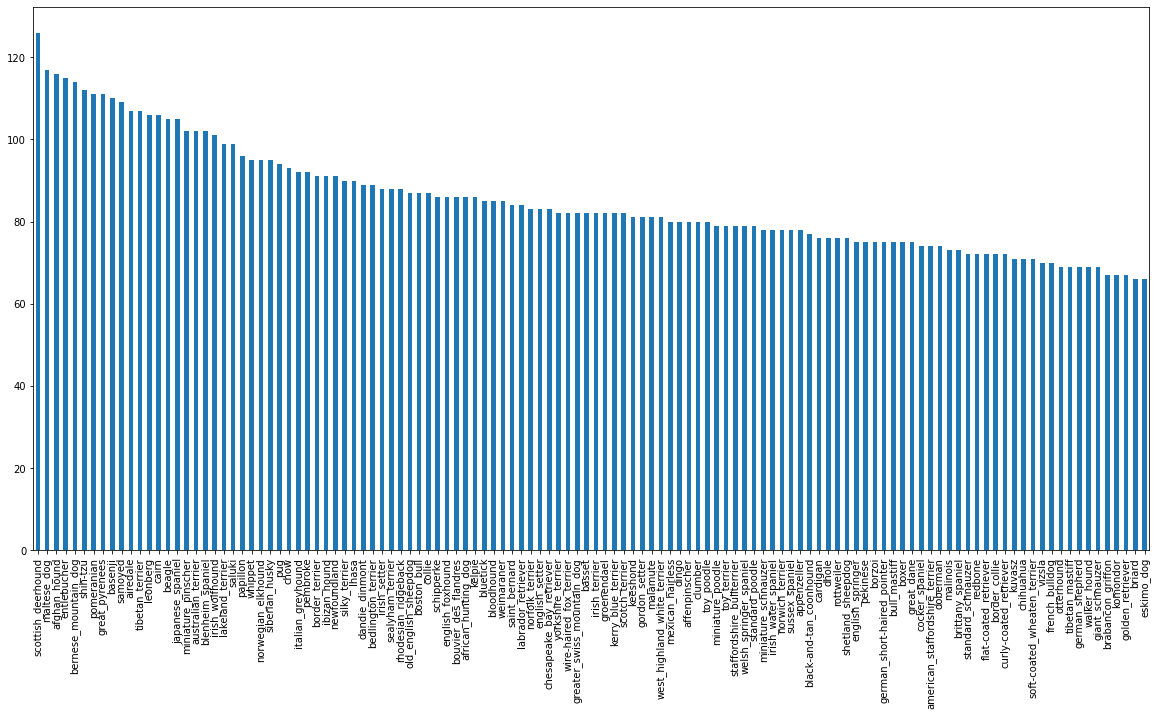

In [0]:
# How many images are there for each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [0]:
labels_csv["breed"].value_counts().median()

82.0

In [0]:
pip install IPython

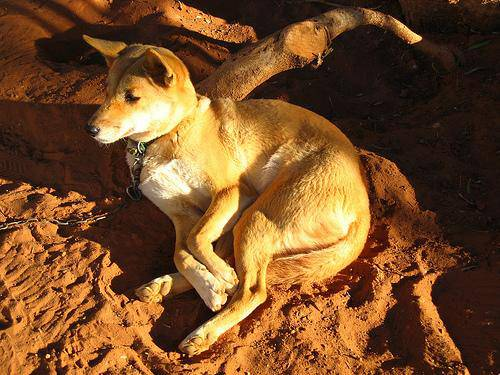

In [0]:
# Let's view an image
from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Let's get a list of all of our image file pathnames

In [0]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [0]:
# Create pathnames from image ID's
filenames = ["drive/My Drive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [0]:

# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/Dog Vision/train/")) == len(filenames):
  print("Proceed")
else:
  print("Filename do not match actual amout of files")


Proceed


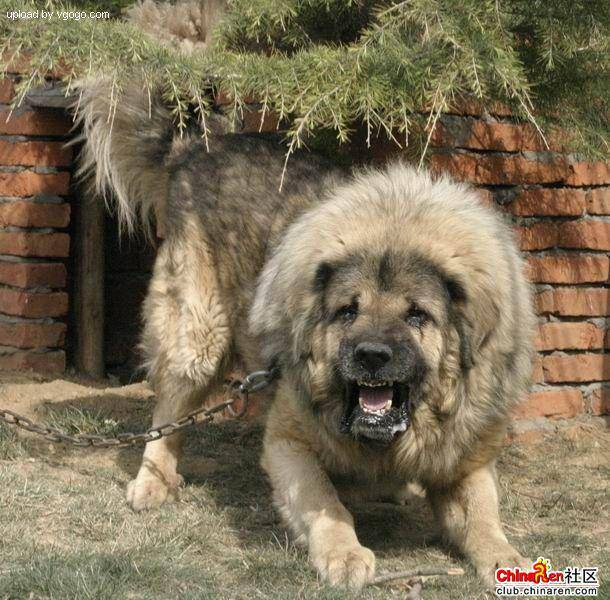

In [0]:
# One more check 
Image(filenames[9000])

In [0]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels

In [0]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [0]:
len(labels)

10222

In [0]:
# see if if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("you good")
else:
  print("oh man")

you good


In [0]:
# Find the unique label values 
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [0]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
len(boolean_labels)

10222

In [0]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index indea where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [0]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set
Since the dataset doesn't come up with a validation set, we will be making our own

In [0]:
# Setup X and Y variables
X = filenames
y = boolean_labels

In [0]:
len(filenames)

10222

We're going to start off experimenting with 1000 images and increase as needed. 

In [0]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [0]:
# Lets split our data into train and validation 
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2, 
                                                  random_state=42)

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [0]:
# Let's have a geez at the training data
x_train[:5], y_train[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

In [0]:
type(tf.constant(y_train))

tensorflow.python.framework.ops.EagerTensor

## Preprocessing images (turning images into Tensors)

To preprocess our images, we're going to write a function which does a few things:
1. Take an image filepath as an input 
2. Use TensorFlow to read the file and save it a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1). 
5. Resize the `image` to be a shape of (224,224)
6. Return the modififed image

Before we do, let's what importing an image looks like.


In [0]:
# Convert an image to Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [0]:
# Turn image into a Tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

Now we've what an image looks like as a Tensor, let's make a function 

In [0]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensor with 3 colour channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)

  # Covert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired values (224, 224)
  image = tf.image.resize(image, size=[img_size, img_size])

  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you're tryingt to process 10,000 images in one go... they all might not fit into memory. 

So that's why we do about 32 (batch size) images at at time. 

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this:
`(image, label)`

In [0]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  
  """
  Take an image file path name and the associated label,
  processes the image and return a tuple of (image,label).
  """

  image = process_image(image_path)
  return image, label

In [0]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors
in the form: `(image, label)`, let's make a function to turn all of our data (x & y)
into batches

In [0]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(batch_size)
  return data_batch

In [0]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [0]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand/comphrehend, let's visualize them. 

In [0]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch. 
  """

  # Setup the figure
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [0]:
train_images, train_labels = next(train_data.as_numpy_iterator())

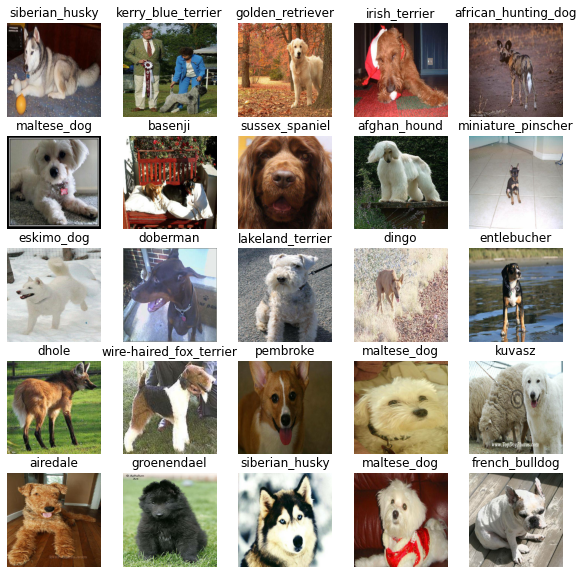

In [0]:
# Now let's visual the data in a training batch 
show_25_images(train_images, train_labels)

index error prevents show images function from working

## Building a model

Beofre we build a model, there are a few things we need to define:
* The input shape (out images shape in the form of Tensors) of our model. 
* The output shape (image labels, in the form of Tensors) of our model. 
* The URL of the model we want to use. 

In [0]:
# Setup input shape to the model 
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


Now we've got out inputs, outputs and model ready to go.
Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape, and the model we've chosen as parameters. 
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that). 
* Compiles the model (says it should be evaluated and improved). 
* Builds the model (tells the model the input shape it'll be getting). 
* Returns the model. 


In [0]:
# Create a function which builds a Keras model 
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):

    print("Building model with:", MODEL_URL)

    # Setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
        tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                            activation="softmax") # Layer 2 (output layer)

    ])

    # Compile the model 
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(), 
        optimizer=tf.keras.optimizers.Adam(), 
        metrics=["accuracy"]
    )

    # Build the model 
    model.build(INPUT_SHAPE)

    return model 

In [0]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training too long. 

### Tensorboard Callback

To setup a Tensorboard callback, we need to do 3 things:
1. Load the Tensorboard notebook extension
2. Create a Tensorboard callback which is able to save logs to a directory and pass it to our model's `fit()` function. 
3. Visualize our models training logs with the `%tensorbord` magic function (we'll do this after model training). 

In [0]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [0]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory folder for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs", 
                        # Make is so the logs get tracked whenever we an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving. 

In [0]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                                  patience=3)

## Training a model (on subset of data)

Our first model is only going to train 1000 images, to make sure everything is working.

In [0]:
NUM_EPOCHS = 100 #@param (type: "slider", min:10, max:100, step:10)

In [0]:
# Check to make sure we're still running on a a GPU
print("GPU", "available (Yes!)" if tf.config.list_physical_devices("GPU") else "note available : (")

GPU available (Yes!)


Let's create a function which trains a model. 

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for and the callbacks we'd like to use
* Return the model


In [0]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """

  # Create a model 
  model = create_model()

  # Create new TensorBoard session everytime we train a model 
  tensorboard = create_tensorboard_callback()

  # Fit the model to ths data passing it the callbacks we created
  model.fit(x=train_data, 
            epochs=NUM_EPOCHS, 
            validation_data=val_data, 
            validation_freq=1, 
            callbacks=[tensorboard, early_stopping])
  
  # Return the fitted model 
  return model 

In [0]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 410s 16s/step - loss: 4.5826 - accuracy: 0.1000 - val_loss: 3.5167 - val_accuracy: 0.2450
Epoch 2/100
25/25 [==============================] - 5s 198ms/step - loss: 1.6308 - accuracy: 0.6975 - val_loss: 2.1945 - val_accuracy: 0.4600
Epoch 3/100
25/25 [==============================] - 5s 204ms/step - loss: 0.5803 - accuracy: 0.9312 - val_loss: 1.6797 - val_accuracy: 0.6100
Epoch 4/100
25/25 [==============================] - 5s 212ms/step - loss: 0.2582 - accuracy: 0.9887 - val_loss: 1.5203 - val_accuracy: 0.6300
Epoch 5/100
25/25 [==============================] - 5s 206ms/step - loss: 0.1490 - accuracy: 0.9975 - val_loss: 1.4575 - val_accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 5s 206ms/step - loss: 0.1023 - accuracy: 1.0000 - val_loss: 1.4108 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================

 **Question:** It looks like our model is overfitting because it's performing far better on the training dataset than the validation dataset, what are some of the ways to prevent model overfitting in deep learning neural networks?

 **Note:** Overfitting to begin with is a good thing! It means our model is learning!!
 

### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its contents. 

In [0]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

## Making and evaluation predictions using a trained model

In [0]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 74s 11s/step


array([[0.00140392, 0.00070101, 0.00096487, ..., 0.01937192, 0.01008793,
        0.008243  ],
       [0.00169692, 0.00739521, 0.00059617, ..., 0.00682627, 0.00142239,
        0.01081555],
       [0.00426602, 0.00622861, 0.08346289, ..., 0.00013797, 0.00394308,
        0.00080752],
       ...,
       [0.00095475, 0.01024329, 0.01376685, ..., 0.00242697, 0.00074325,
        0.00655016],
       [0.00420563, 0.00585863, 0.00500188, ..., 0.00422259, 0.00298897,
        0.02781265],
       [0.00382082, 0.00133282, 0.01638107, ..., 0.00030236, 0.01663589,
        0.00521743]], dtype=float32)

In [0]:
predictions.shape

(200, 120)

In [0]:
len(y_val)

200

In [0]:
 # First prediction
 index=0
 print(predictions[index])
 print(f"Max value (probability of prediction): {np.max(predictions[0])}")
 print(f"Sum: {np.sum(predictions[index])}")
 print(f"Max index: {np.argmax(predictions[index])}")
 print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.4039157e-03 7.0100720e-04 9.6486899e-04 4.7454669e-04 1.5758548e-02
 1.7265138e-03 2.4310048e-03 3.1070330e-03 4.1639470e-03 1.8685255e-03
 8.4361597e-04 7.1022329e-03 3.5106344e-04 4.2336518e-03 4.6890168e-03
 1.2249243e-02 1.5491403e-02 3.6407751e-04 8.2530797e-04 4.5690145e-02
 2.3975039e-02 2.6786590e-03 2.0990022e-03 1.8680800e-04 1.1677360e-03
 1.0782061e-02 4.7557717e-03 2.1078486e-02 2.3022793e-02 1.0446910e-01
 6.2594842e-04 1.1010206e-03 6.5324767e-03 2.0980695e-04 1.4500044e-02
 2.1079527e-03 1.8215042e-02 6.5972963e-03 5.9436760e-03 1.3841692e-02
 1.5969843e-02 1.4512772e-03 4.6694430e-04 6.6236575e-04 8.7725994e-04
 1.1578610e-02 7.1228552e-04 1.5218606e-03 1.6706847e-03 1.0152881e-03
 8.5062692e-03 2.0964134e-03 2.0802539e-02 4.2211898e-03 3.5605840e-02
 6.1759185e-02 2.8686866e-03 3.0257592e-03 3.1203896e-04 1.9437699e-02
 2.6441463e-03 5.1553398e-03 1.0063423e-02 2.3268652e-03 6.3231015e-03
 2.4307247e-02 6.3152742e-03 1.3981976e-03 4.1804076e-03 2.4092875e-03
 3.360

Having the above functionality is great but we want to be able to do it at scale. 

And it would be even better if we could see the image the prediction is being made on! 

**Note:** Prediction probability are also known as confidence levels

In [0]:
# Turn prediction probabilites into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):

  """
  Turns an array of prediction probabilities into a label
  """

  return unique_breeds[np.argmax(prediction_probabilities)]


# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label


'brabancon_griffon'

Now since our validation data is still in a batch dataset, 
we'll have to unbatchify it to make predictions on the validation images
and then compare those predictions to the validation labels (truth labels)

In [0]:
# Create a function to unbatch a batch dataset
def unbatchify(data):

  """
  Take a batched data of (image, label) Tensors and returns separate arrays
  of images and labels. 
  """

  images_ = []
  labels_ = []

  # Loops through unbatched data
  for image, label, in data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(unique_breeds[np.argmax(label)])

  
  return images_,labels_

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)

Now we've got ways to get get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some functions to make these all a bit more visual. 

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and integers. 
* Convert the prediction probabilities to a predicted label. 
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.

In [0]:
def plot_pred(prediction_probabilities, labels, images, n=1):

  """
  View the prediction, ground truth and image for sample n
  """

  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  
  # Change plot title to be prediction, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label, 
                                    np.max(pred_prob)*100, 
                                      true_label), 
                                    color=color)
                                

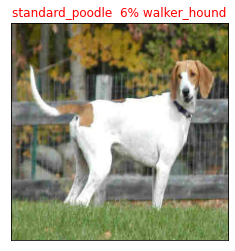

In [0]:
plot_pred(prediction_probabilities=predictions, 
          labels=val_labels, 
          images=val_images,
          n=32)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions


This functino will: 
* Take an input of prediction probabilities array and a a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediciton probailities values
  * Prediction labels

* Plot the top 10 prediction probability values and labels, coloring the true label green

In [0]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plot the top 10 highest prediction confidences along with teh truth label for sample n. 
  """

  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidences values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes] 

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)), 
             labels=top_10_pred_labels, 
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass



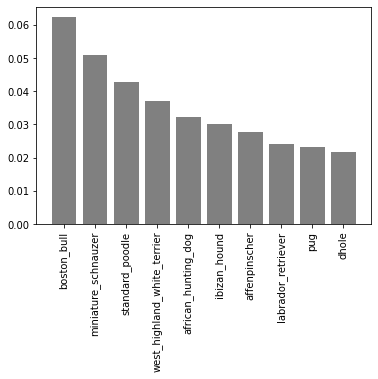

In [0]:
plot_pred_conf(prediction_probabilities=predictions, 
               labels=val_labels, 
               n=9)

Now we've got some functions to help us visualize our predictions and evaluate our model, let's check out a few

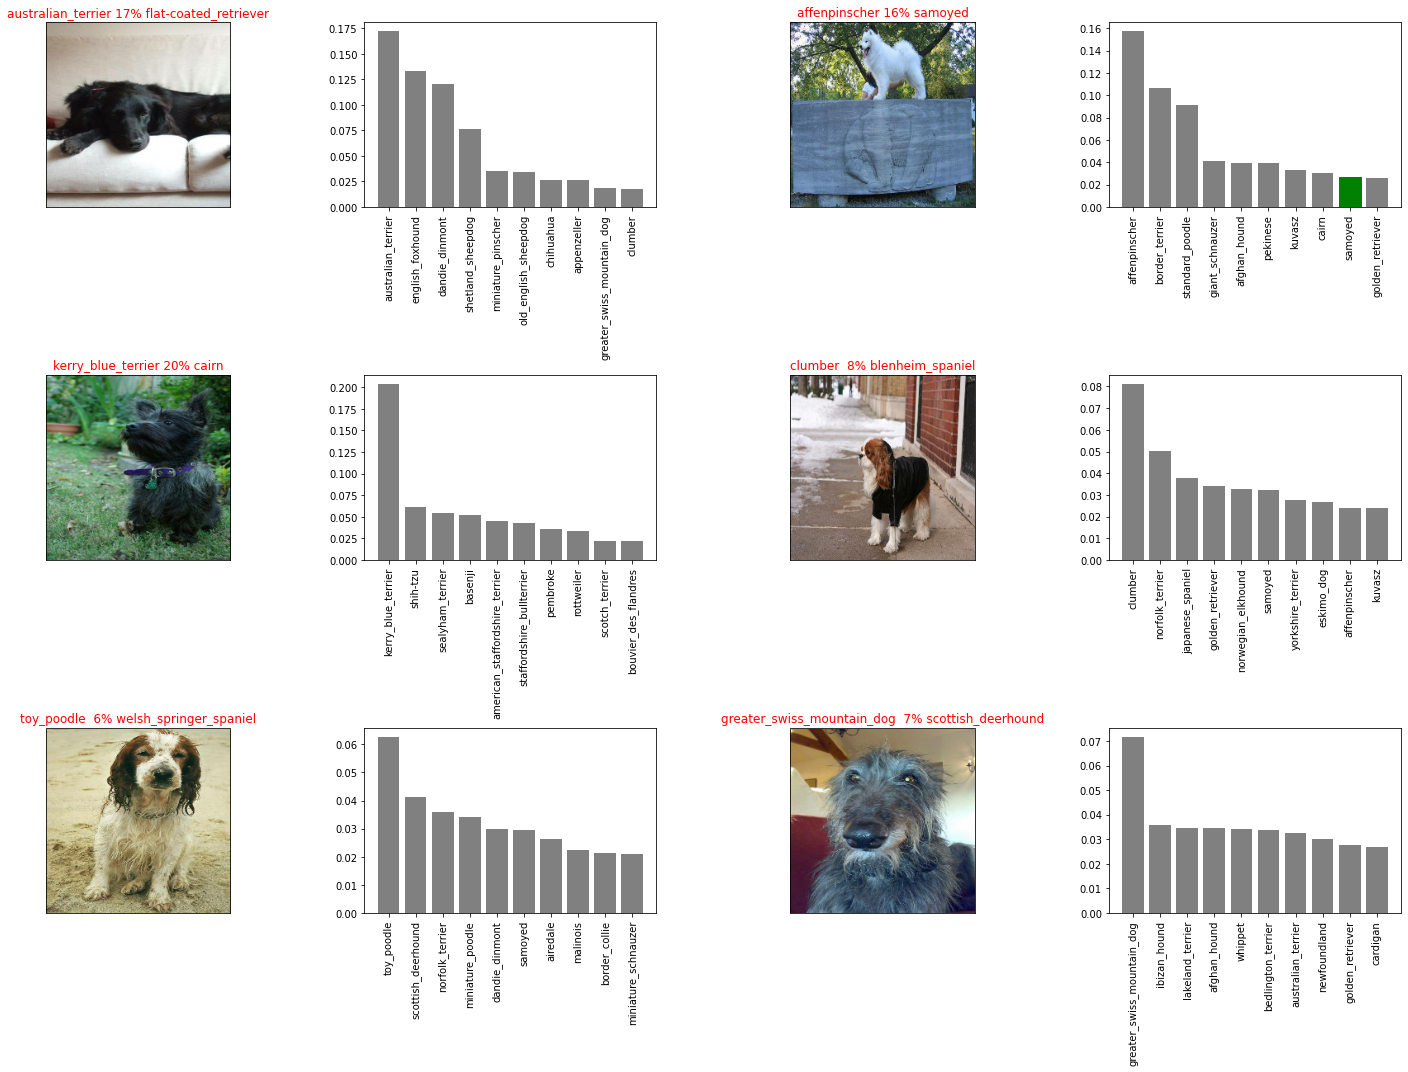

In [0]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions, 
           labels=val_labels, 
           images=val_images, 
           n=i+i_multiplier)
  
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions, 
                 labels=val_labels, 
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()


## Saving and reloading a trained model 

In [0]:
# Crete a function to save a model 
def save_model(model, suffix=None):
  """
  Saves a given model in a models directors and appends a suffix (string). 
  """

  # Create a model directory pathname with a current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/models", 
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model 
  print(f"Saving model to {model_path}...")
  model.save(model_path)
  return model_path


In [0]:
# Create a function to load a trained model 
def load_model(model_path):
  """
  Loads a saved model from a specificed path. 
  """
  print(f"Loading a saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model 

In [0]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")


Saving model to drive/My Drive/Dog Vision/models/20200502-22561588460161-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20200502-22561588460161-1000-images-mobilenetv2-Adam.h5'

In [0]:
# Load a trained model 
loaded_1000_image_model = load_model('drive/My Drive/Dog Vision/models/20200502-22561588460161-1000-images-mobilenetv2-Adam.h5')

Loading a saved model from: drive/My Drive/Dog Vision/models/20200502-22561588460161-1000-images-mobilenetv2-Adam.h5


In [0]:
# Evaluate the pre-saved model 
model.evaluate(val_data)

7/7 [==============================] - 1s 117ms/step - loss: 5.7846 - accuracy: 0.0000e+00


[5.784572601318359, 0.0]

In [0]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 116ms/step - loss: 5.7846 - accuracy: 0.0000e+00


[5.784572601318359, 0.0]

## Training a big dog model (on the full data)

In [0]:
len(X), len(y)

(10222, 10222)

In [0]:
# Create a data batch with the full data set
full_data = create_data_batches(X,y)

Creating training data batches...


In [0]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
# Create a model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
                                                            patience=3)



In [0]:
# Fit the tfull model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS, 
               callbacks=[full_model_tensorboard, full_model_early_stopping])


Epoch 1/100
320/320 [==============================] - 4813s 15s/step - loss: 1.3470 - accuracy: 0.6667
Epoch 2/100
320/320 [==============================] - 56s 175ms/step - loss: 0.4016 - accuracy: 0.8790
Epoch 3/100
320/320 [==============================] - 49s 154ms/step - loss: 0.2365 - accuracy: 0.9346
Epoch 4/100
320/320 [==============================] - 49s 152ms/step - loss: 0.1548 - accuracy: 0.9615
Epoch 5/100
320/320 [==============================] - 50s 155ms/step - loss: 0.1091 - accuracy: 0.9764
Epoch 6/100
320/320 [==============================] - 48s 150ms/step - loss: 0.0783 - accuracy: 0.9874
Epoch 7/100
320/320 [==============================] - 48s 151ms/step - loss: 0.0610 - accuracy: 0.9906
Epoch 8/100
320/320 [==============================] - 49s 154ms/step - loss: 0.0469 - accuracy: 0.9940
Epoch 9/100
320/320 [==============================] - 49s 152ms/step - loss: 0.0378 - accuracy: 0.9967
Epoch 10/100
320/320 [==============================] - 50s 157m

In [0]:
save_model(model, suffix="full-image-set-mobilenetv2-Adam")


Saving model to drive/My Drive/Dog Vision/models/20200503-01121588468359-full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20200503-01121588468359-full-image-set-mobilenetv2-Adam.h5'

In [0]:
loaded_full_model = load_model('drive/My Drive/Dog Vision/models/20200503-01121588468359-full-image-set-mobilenetv2-Adam.h5')


Loading a saved model from: drive/My Drive/Dog Vision/models/20200503-01121588468359-full-image-set-mobilenetv2-Adam.h5


## Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format. 

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches. 

To make predictions on the test data, we'll: 
* Get the test image filenames. 
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since th test data doesn't have labels). 
* Make a predictions array by passing the test batches to the predict() method called on our model. 



In [0]:
# Load test image filenames
test_path = "drive/My Drive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog Vision/test/f5319adc463ccf7e82f10a34ce39c190.jpg',
 'drive/My Drive/Dog Vision/test/f42473f75caedac6010537ddd05b1a86.jpg',
 'drive/My Drive/Dog Vision/test/ec81d166f296c1809d8be99cdabb5904.jpg',
 'drive/My Drive/Dog Vision/test/e85291fc6ba44e39defc7769fa020646.jpg',
 'drive/My Drive/Dog Vision/test/e917abf625ad6ba5b8a0e59bd23e8818.jpg',
 'drive/My Drive/Dog Vision/test/ec24efc47314fd121b67155b56eabccf.jpg',
 'drive/My Drive/Dog Vision/test/f12b509213db8bb0a721fcd228b31f0e.jpg',
 'drive/My Drive/Dog Vision/test/eab189c5274b79b36dd566fea4e9847e.jpg',
 'drive/My Drive/Dog Vision/test/f18e43d6627bf395c2e3aae518067004.jpg',
 'drive/My Drive/Dog Vision/test/ec28370f936f20133526ee5bdb894c9c.jpg']

In [0]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [0]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [0]:
# Make predictions on test data batch using the loaded full model 
test_predictions = loaded_full_model.predict(test_data, 
                                             verbose=1)

 59/324 [====>.........................] - ETA: 1:07:36

In [0]:
# Load predictions file
import numpy as np
test_predictions = np.loadtxt("drive/My Drive/Dog Vision/preds_array.csv", delimiter=",")

In [0]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for Kaggle

We need an ID and a column for each dog breed. 

* Create a pandas DataFrame with an ID column as well as a column for each dog breed. 
* Add data to the ID column by extracting the test image ID's from their filepaths. 
* Add data (the prediction probabilities) to each of the dog breed columsn. 
* Export the DataFrame as a CSV to submit it to Kaggle. 

In [0]:
# Create a pandas Dataframe 
import pandas as pd
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [0]:
# Append test image ID's to predictions DataFrame

test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]

In [0]:
preds_df["id"] = test_ids

In [0]:
preds_df.head()

id  ... yorkshire_terrier
0  f5319adc463ccf7e82f10a34ce39c190  ...               NaN
1  f42473f75caedac6010537ddd05b1a86  ...               NaN
2  ec81d166f296c1809d8be99cdabb5904  ...               NaN
3  e85291fc6ba44e39defc7769fa020646  ...               NaN
4  e917abf625ad6ba5b8a0e59bd23e8818  ...               NaN

[5 rows x 121 columns]

In [0]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  f5319adc463ccf7e82f10a34ce39c190  ...       1.52162e-06
1  f42473f75caedac6010537ddd05b1a86  ...       2.56981e-10
2  ec81d166f296c1809d8be99cdabb5904  ...       7.41861e-11
3  e85291fc6ba44e39defc7769fa020646  ...       6.13453e-11
4  e917abf625ad6ba5b8a0e59bd23e8818  ...       1.31887e-06

[5 rows x 121 columns]

In [0]:
preds_df.to_csv("drive/My Drive/Dog Vision/full_model_predictions_sub1_mobilenetV2.csv", 
                index=False)